# Semantic Segmentation
## What is Semantic Segmentation?
Semantic segmentation refers to the process of linking each pixel in an image to a class label. It can also be referred to as **image classification for pixels** in an image. Its primary applications include autonomous vehicles, human-computer interaction, robotics and photo-editing tools. It is very useful for delf-driving cars in which contextual information of the environment is required at each and every step while traversing the route.

![alt text](https://miro.medium.com/max/1000/1*wbaUQkYzRhvmd7IjKJjjCg.gif)


## Aim of this project
What we aim to do in this project is to perform semantic segmentation on CAMVID dataset and evaluate the deep learning model by using some metrics.

## Deep Learning architecture
For this project, I am going to use unet architecture, which was developed by Olaf Ronneberger et al. for Bio Medical Image Segmentation. The architecture of this model is similar to that of an autoencoder. The encoding path consists of a series of convolutions, also known as the down-sampling path. The decoding path consists of upconvolutions (transposed convolutions are used in this case). It's also called the up-sampling path. The architecture of unet is fully convolutional, wherein we are using the Cross Entropy Loss.

![alt text](https://miro.medium.com/max/1600/1*OkUrpDD6I0FpugA_bbYBJQ.png)

## Specific details of the dataset used
The Cambridge-driving Labeled Video Database (CamVid) is the first collection of videos with object class semantic labels, complete with metadata. The database provides ground truth labels that associate each pixel with one of 32 semantic classes.

## Deep Learning Framework used
I=We have used PyTorch as the deep learning framework for this task.

## Steps involved


1.   Data-preprocessing
2.   Data-loading (using custom dataloaders)
3.   Developing the deep learning architecture
4.   Training the model
5.   Evaluating the model:
     1.   Pixel Accuracy
     2.   Intersection over Union
6.   Testing for a particular sample image





# Data-preprocessing
In any machine learning task, most of the effort goes in converting the given raw data into the format we require. So, our main aim is to load the CAMVID dataset images, convert the segmented dataset into required ground truth label and storing this data into a list which shall be later fed to the dataloaders.

In [0]:
# We will import all the important libraries which are required for the execution of this task

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import cv2 
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
# We will mount google drive here so that we can access the folders and files in google drive

from google.colab import drive
drive.mount('/content/gdrive');

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Import train, validation and test images from the folders and store these in a list

def load_img(folder):
    images = [];
    for filename in os.listdir(folder): # List all the filenames in the folder
        img = cv2.imread(os.path.join(folder, filename)); # Join the link of the folder and filename
        img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA);
        images.append(img);
    return images

# To load labeled gray-scaled images

def load_label_img(folder):
    images = [];
    for filename in os.listdir(folder): # List all the filenames in the folder
        img = cv2.imread(os.path.join(folder, filename)); # Join the link of the folder and filename
        img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA);
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
        images.append(img);
    return images

We are converting the segmented label images into grayscale because it simplifies the problem of converting these images into ground truth label matrices (we shall see this later on).

In [0]:
# Convert the output labels to pixel-wise classes

def c2g(cn):
    cn = np.reshape(cn, (1, 1, 3));
    cn = cv2.cvtColor(cn, cv2.COLOR_BGR2GRAY);
    return cn;

# Pixels corresponding to each class are stored in the list in gray scale form

colors = [];
colors.append(c2g(np.array([64, 128, 64], dtype = 'uint8')));
colors.append(c2g(np.array([128, 0, 192], dtype = 'uint8')));
colors.append(c2g(np.array([192, 128, 0], dtype = 'uint8')));
colors.append(c2g(np.array([64, 128, 0], dtype = 'uint8')));
colors.append(c2g(np.array([0, 0, 128], dtype = 'uint8')));
colors.append(c2g(np.array([128, 0, 64], dtype = 'uint8')));
colors.append(c2g(np.array([192, 0, 64], dtype = 'uint8')));
colors.append(c2g(np.array([64, 128, 192], dtype = 'uint8')));
colors.append(c2g(np.array([128, 192, 192], dtype = 'uint8')));
colors.append(c2g(np.array([128, 64, 64], dtype = 'uint8')));
colors.append(c2g(np.array([192, 0, 128], dtype = 'uint8')));
colors.append(c2g(np.array([64, 0, 192], dtype = 'uint8')));
colors.append(c2g(np.array([64, 128, 128], dtype = 'uint8')));
colors.append(c2g(np.array([192, 0, 192], dtype = 'uint8')));
colors.append(c2g(np.array([64, 64, 128], dtype = 'uint8')));
colors.append(c2g(np.array([128, 192, 64], dtype = 'uint8')));
colors.append(c2g(np.array([0, 64, 64], dtype = 'uint8')));
colors.append(c2g(np.array([128, 64, 128], dtype = 'uint8')));
colors.append(c2g(np.array([192, 128, 128], dtype = 'uint8')));
colors.append(c2g(np.array([192, 0, 0], dtype = 'uint8')));
colors.append(c2g(np.array([128, 128, 192], dtype = 'uint8')));
colors.append(c2g(np.array([128, 128, 128], dtype = 'uint8')));
colors.append(c2g(np.array([192, 128, 64], dtype = 'uint8')));
colors.append(c2g(np.array([64, 0, 0], dtype = 'uint8')));
colors.append(c2g(np.array([64, 64, 0], dtype = 'uint8')));
colors.append(c2g(np.array([128, 64, 192], dtype = 'uint8')));
colors.append(c2g(np.array([0, 128, 128], dtype = 'uint8')));
colors.append(c2g(np.array([192, 128, 192], dtype = 'uint8')));
colors.append(c2g(np.array([64, 0, 64], dtype = 'uint8')));
colors.append(c2g(np.array([0, 192, 192], dtype = 'uint8')));
colors.append(c2g(np.array([0, 0, 0], dtype = 'uint8')));
colors.append(c2g(np.array([0, 192, 64], dtype = 'uint8')));

def class_pixel(label_img):
    class_pix = np.ones([128, 128, 1], dtype = int);
    for index, c in enumerate(colors):
        class_pix[label_img == c] = index; # Vectorized masking is much much faster
    return class_pix

Our main aim in the above function is to convert segmented label images to ground truth label form.

In [0]:
# Convert all segmented images into labeled images

def label_img_list(img_list):
    images = [];
    for image in img_list:
        images.append(class_pixel(image));
    return images;


# Data-loading
In this step, we define transforms that have be applied on the image as well as the image labels. Then we create custom dataset classes in order to load the train, validation and test images and labels.

In [0]:
# Define the transformations that have to be applied on the images

transform_img = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],   # input[channel] = (input[channel] - mean[channel]) / std[channel]
                        std=[0.5, 0.5, 0.5])])

transform_img_label = transforms.Compose([
    transforms.ToTensor()
])

from torch.utils.data import Dataset, DataLoader

# We have to create custom classes in order to use the DataLoader. These classes inherit the Dataset class

class trainset(data.Dataset):
    def __init__(self, transform = None, root_train = None, root_train_label = None, transform_label = None):
        self.train_img = load_img(root_train);
        self.transform = transform;
        self.transform_label = transform_label;
        self.train_label_img = label_img_list(load_label_img(root_train_label));
        
    def __len__(self):
        return len(self.train_img);
    
    def __getitem__(self, index):
        img = self.transform(self.train_img[index]);
        label = self.transform_label(self.train_label_img[index]);
        return img, label;

class valset(data.Dataset):
    def __init__(self, transform = None, root_val = None, root_val_label = None, transform_label = None):
        self.val_img = load_img(root_val);
        self.transform = transform;
        self.transform_label = transform_label;
        self.val_label_img = label_img_list(load_label_img(root_val_label));
        
    def __len__(self):
        return len(self.val_img);
    
    def __getitem__(self, index):
        img = self.transform(self.val_img[index]);
        label = self.transform_label(self.val_label_img[index]);
        return img, label

    
class testset(data.Dataset):
    def __init__(self, transform = None, root_test = None, root_test_label = None, transform_label = None):
        self.test_img = load_img(root_test);
        self.transform = transform;
        self.transform_label = transform_label;
        self.test_label_img = label_img_list(load_label_img(root_test_label));
        
    def __len__(self):
        return len(self.test_img);
    
    def __getitem__(self, index):
        img = self.transform(self.test_img[index]);
        label = self.transform_label(self.test_label_img[index]);
        return img, label


traindataset = trainset(transform_img, '/content/gdrive/My Drive/Camvid dataset/train/', '/content/gdrive/My Drive/Camvid dataset/train_labels/', transform_img_label);
valdataset = valset(transform_img, '/content/gdrive/My Drive/Camvid dataset/val/', '/content/gdrive/My Drive/Camvid dataset/val_labels/', transform_img_label);
testdataset = testset(transform_img, '/content/gdrive/My Drive/Camvid dataset/test/', '/content/gdrive/My Drive/Camvid dataset/test_labels/', transform_img_label);

# We have to instantiate these classes and feed this to the dataloader

In [0]:
# Dataloaders are used for loading the dataset

train_loader = data.DataLoader(traindataset, batch_size = 2, shuffle=True,  num_workers=4);
val_loader = data.DataLoader(valdataset, batch_size = 2, shuffle=True,  num_workers=4);
test_loader = data.DataLoader(testdataset, batch_size = 2, shuffle=True,  num_workers=4);

# Developing the deep learning architecture
Here we created the unet architecture for a 128 by 128 input image size. We have also devised an architecture for a 512 by 512 input image size. In order to have less gpu memory usage, we chose the 128 by 128 image architecture.

In [0]:
class u_net(nn.Module):

  def __init__(self):
    super().__init__();
    self.conv1 = nn.Conv2d(3, 64, 3);
    self.conv2 = nn.Conv2d(64, 128, 3);
    self.conv3 = nn.Conv2d(128, 256, 3);
    self.conv4 = nn.Conv2d(256, 512, 3);
    self.conv5 = nn.Conv2d(512, 1024, 3);
    self.conv6 = nn.Conv2d(1024, 512, 3);
    self.conv7 = nn.Conv2d(512, 512, 3);
    self.conv8 = nn.Conv2d(512, 256, 3);
    self.conv9 = nn.Conv2d(256, 256, 3);
    self.conv10 = nn.Conv2d(256, 128, 3);
    self.conv11 = nn.Conv2d(128, 128, 3);
    self.b1 = nn.BatchNorm2d(64);
    self.b2 = nn.BatchNorm2d(128);
    self.b3 = nn.BatchNorm2d(256);
    self.b4 = nn.BatchNorm2d(512);
    self.b5 = nn.BatchNorm2d(1024);
    self.convT1 = nn.ConvTranspose2d(1024, 512, 2, 2);
    self.convT2 = nn.ConvTranspose2d(512, 256, 2, 2);
    self.convT3 = nn.ConvTranspose2d(256, 256, 2, 2);
    self.convT4 = nn.ConvTranspose2d(128, 64, 2, 2);
    self.convT5 = nn.ConvTranspose2d(64, 32, 2, 2);
    self.pool1 = nn.MaxPool2d(2, 2);

  def forward(self, x):
    x = F.relu(self.b1(self.conv1(x)));
    x = F.relu(self.b2(self.conv2(x)));
    x = self.pool1(x);
    x = F.relu(self.b2(self.conv11(x)));
    x = F.relu(self.b3(self.conv3(x)));
    x1 = x;
    x1 = x1[:, :, int((58 - 24)/2) : int((58 + 24)/2), int((58 - 24)/2) : int((58 + 24)/2)];
    x = self.pool1(x);
    x = F.relu(self.b3(self.conv9(x)));
    x = F.relu(self.b4(self.conv4(x)));
    x2 = x;
    x2 = x2[:, :, int((25 - 16)/2) : int((25 + 16)/2), int((25 - 16)/2) : int((25 + 16)/2)];
    x = self.pool1(x);
    x = F.relu(self.b4(self.conv7(x)));
    x = F.relu(self.b5(self.conv5(x)));
    x = self.b4(self.convT1(x));
    x = torch.cat((x2, x), dim = 1);
    x = F.relu(self.b4(self.conv6(x)));
    x = F.relu(self.b4(self.conv7(x)));
    x = self.b3(self.convT2(x));
    x = torch.cat((x1, x), dim = 1);
    x = F.relu(self.b3(self.conv8(x)));
    x = F.relu(self.b3(self.conv9(x)));
    x = self.b3(self.convT3(x));
    x = F.relu(self.b2(self.conv10(x)));
    x = F.relu(self.b2(self.conv11(x)));
    x = F.relu(self.b2(self.conv11(x)));
    x = F.relu(self.b2(self.conv11(x)));
    x = self.b1(self.convT4(x));
    x = self.convT5(x);
    del x1;
    del x2;
    return x;

In [0]:
class u_net512(nn.Module):

  def __init__(self):
    super().__init__();
    self.conv1 = nn.Conv2d(3, 64, 3);
    self.b1 = nn.BatchNorm2d(64);
    self.conv2 = nn.Conv2d(64, 64, 3);
    self.pool1 = nn.MaxPool2d(2, 2);
    self.conv3 = nn.Conv2d(64, 128, 3);
    self.b2 = nn.BatchNorm2d(128);
    self.conv4 = nn.Conv2d(128, 128, 3);
    self.conv5 = nn.Conv2d(128, 256, 3);
    self.b3 = nn.BatchNorm2d(256)
    self.conv6 = nn.Conv2d(256, 256, 3);
    self.conv7 = nn.Conv2d(256, 512, 3);
    self.b4 = nn.BatchNorm2d(512);
    self.conv8 = nn.Conv2d(512, 512, 3);
    self.conv9 = nn.Conv2d(512, 1024, 3);
    self.b5 = nn.BatchNorm2d(1024);
    self.conv10 = nn.Conv2d(1024, 1024, 3);
    self.convT1 = nn.ConvTranspose2d(1024, 512, 2, 2);
    self.conv11 = nn.Conv2d(1024, 512, 3);
    self.conv12 = nn.Conv2d(512, 512, 3);
    self.convT2 = nn.ConvTranspose2d(512, 256, 2, 2);
    self.conv13 = nn.Conv2d(512, 256, 3);
    self.conv14 = nn.Conv2d(256, 256, 3);
    self.convT3 = nn.ConvTranspose2d(256, 128, 2, 2);
    self.conv15 = nn.Conv2d(256, 128, 3);
    self.conv16 = nn.Conv2d(128, 128, 3);
    self.convT4 = nn.ConvTranspose2d(128, 64, 2, 2);
    self.convT5 = nn.ConvTranspose2d(64, 32, 2, 2);
    self.conv17 = nn.Conv2d(32, 32, 145);

  def forward(self, x):
    x = F.relu(self.b1(self.conv1(x)));
    x = F.relu(self.b1(self.conv2(x)));
    x = self.pool1(x);
    x = F.relu(self.b2(self.conv3(x)));
    x = F.relu(self.b2(self.conv4(x)));
    x1 = x;
    x1 = x1[:, :, int((250 - 168)/2) : int((250 + 168)/2), int((250 - 168)/2) : int((250 + 168)/2)];
    x = self.pool1(x);
    x = F.relu(self.b3(self.conv5(x)));
    x = F.relu(self.b3(self.conv6(x)));
    x2 = x;
    x2 = x2[:, :, int((121 - 88)/2) : int((121 + 88)/2), int((121 - 88)/2) : int((121 + 88)/2)];
    x = self.pool1(x);
    x = F.relu(self.b4(self.conv7(x)));
    x = F.relu(self.b4(self.conv8(x)));
    x3 = x;
    x3 = x3[:, :, int((56 - 48)/2) : int((56 + 48)/2), int((56 - 48)/2) : int((56 + 48)/2)];
    x = self.pool1(x);
    x = F.relu(self.b5(self.conv9(x)));
    x = F.relu(self.b5(self.conv10(x)));
    x = self.b4(self.convT1(x));
    x = torch.cat((x3, x), dim = 1);
    x = F.relu(self.b4(self.conv11(x)));
    x = F.relu(self.b4(self.conv12(x)));
    x = self.b3(self.convT2(x)); 
    x = torch.cat((x2, x), dim = 1);
    x = F.relu(self.b3(self.conv13(x)));
    x = F.relu(self.b3(self.conv14(x)));
    x = self.b2(self.convT3(x)); 
    x = torch.cat((x1, x), dim = 1);
    x = F.relu(self.b2(self.conv15(x)));
    x = F.relu(self.b2(self.conv16(x)));
    x = self.b1(self.convT4(x)); 
    x = self.convT5(x);
    x = F.relu(self.conv17(x));
    del x1;
    del x2;
    del x3;
    return x;

In [25]:
# Putting the model into the gpu

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)
UNET = u_net();
UNET.to(device);

cuda:0


In [0]:
# Setting the loss functions and the optimizers that we are going to use here

criterion = nn.CrossEntropyLoss();
optimizer = optim.Adam(UNET.parameters(), lr = 0.0001, betas = (0.9, 0.999), eps = 1e-08, weight_decay=0, amsgrad=False);

# Training the model

In [0]:
losses = []

for j in range(500):
  for i, data in enumerate(train_loader):  
    inputs, labels = data;
    if labels.size() == torch.Size([1, 1, 128, 128]):
      labels = labels.reshape(1, 128, 128);
    elif labels.size() == torch.Size([2, 1, 128, 128]):
      labels = labels.reshape(2, 128, 128);
    inputs, labels = inputs.to(device), labels.to(device);
    optimizer.zero_grad();
    outputs = UNET(inputs);
    loss = criterion(outputs, labels);
    loss.backward();
    optimizer.step();
    losses.append(loss.item())

In [0]:
# Visualization of the loss (convergence)

plt.plot(losses)
print('The variation of loss function can be seen as:')
plt.show()

# We will use a gaussian filter to smoothen the curve
from scipy.ndimage import gaussian_filter1d

ls = gaussian_filter1d(losses, 100) # Where 1 is the standard deviation
print('After applying Gaussian filter:')
plt.plot(ls)
plt.show()

In [0]:
# Saving the model

PATH = '/content/gdrive/My Drive/Camvid dataset/saved.pth';
torch.save(UNET.state_dict(),PATH); # A state_dict is simply a Python dictionary 
# object that maps each layer to its parameter tensor. 

In [0]:
# Loading the model

PATH = '/content/gdrive/My Drive/Camvid dataset/saved.pth';
UNET.load_state_dict(torch.load(PATH))

# Metrics for evaluating the model
## Pixel-wise accuarcy:

It is the percentage of pixels in the image that are classified correctly. But the main issue in this kind of classification is in the case of **class-imbalance**. Suppose, we have an image wherein there are two classes. We have to perform semantic segmentation on this image. But the scenario is that - the first class covers 95 percent of the image. So while training, the model will very well learn about the presence of the class that covers most of the image. So the test accuracy can be very high. But the second class might not get detected correctly. We won't know about that if we use pixel-wise accuracy.

In [58]:
# Compute test-set accuracy

def corr(x): # To get proper correspondence between the outputs and the labels
    x = x.cpu();
    x = x.detach().numpy(); # Detach() was used as one can't convert a pytorch tensor to a numpy array if
    # required_grad is set True for that variable
    x = x.argmax(axis = 1);
    return x;

correct = 0;
total = 0;
for i, data in enumerate(val_loader):
    inputs, labels = data;
    inputs = inputs.to(device);
    outputs = UNET.forward(inputs);
    outputs = corr(outputs);
    if labels.size() == torch.Size([outputs.shape[0], 1, 128, 128]):
      labels = labels.detach().numpy();
      labels = labels.reshape(outputs.shape[0], 128, 128);
    # labels = labels.reshape(4, 512, 512);
    outputs = outputs.reshape(outputs.shape[0], 128, 128);
    for i in range(128):
      for j in range(128):
        for k in range(1):
          total = total + 1;
          if outputs[k, i, j] == labels[k, i, j]:
            correct = correct + 1;
print("Hence, the pixel-wise accuracy is ", (correct/total) * 100);

Hence, the pixel-wise accuracy is  40.53442818777902


## Intersection Over Union (Jaccard Index)
This is a better metric than pixel wise accuracy. This is because, here we calculate the intersection over union for every class and then take their average. So, if any class-imbalance is present, it will definitely get pointed out by this metric.

![alt text](https://miro.medium.com/max/450/0*kraYHnYpoJOhaMzq.png)

In [0]:
IOUf = 0
count = 0
for i, data in enumerate(test_loader):
    inputs, labels = data;
    inputs = inputs.to(device);
    outputs = UNET.forward(inputs);
    outputs = corr(outputs);
    if labels.size() == torch.Size([outputs.shape[0], 1, 128, 128]):
      labels = labels.detach().numpy();
      labels = labels.reshape(outputs.shape[0], 128, 128);
    outputs = outputs.reshape(outputs.shape[0], 128, 128);
    for k in range(outputs.shape[0]):
      o = outputs[k, :, :]
      l = labels[k, :, :]
      IOU = 0
      for c in range(32):
        intersectionc = 0
        unionc = 0
        f = c * np.ones((1, 128, 128))
        i = (o == c) * 1
        j = (l == c) * 1
        inte = 0
        for x in range(128):
          for y in range(128):
            if i[x, y] == j[x, y] and i[x, y] == 1:
              inte = inte + 1
        intersectionc = intersectionc + inte
        unionc = unionc + ((f == l) * 1).sum() + ((f == o) * 1).sum() - inte
        if unionc == 0:
         continue
        IOUc = (intersectionc)/(unionc)
        IOU = IOU + IOUc
      count = count + 1
      IOU = IOU/32
    IOUf = IOUf + IOU

In [117]:
print('The intersection-over-union is', IOUf/count * 100)

The intersection over union is 17.42041493261219


# Testing the model for a sample image

In [0]:
# Converting back to colored form

# Pixels corresponding to each class are stored in the list
colors = [];
colors.append(np.array([64, 128, 64], dtype = 'uint8'));
colors.append(np.array([128, 0, 192], dtype = 'uint8'));
colors.append(np.array([192, 128, 0], dtype = 'uint8'));
colors.append(np.array([64, 128, 0], dtype = 'uint8'));
colors.append(np.array([0, 0, 128], dtype = 'uint8'));
colors.append(np.array([128, 0, 64], dtype = 'uint8'));
colors.append(np.array([192, 0, 64], dtype = 'uint8'));
colors.append(np.array([64, 128, 192], dtype = 'uint8'));
colors.append(np.array([128, 192, 192], dtype = 'uint8'));
colors.append(np.array([128, 64, 64], dtype = 'uint8'));
colors.append(np.array([192, 0, 128], dtype = 'uint8'));
colors.append(np.array([64, 0, 192], dtype = 'uint8'));
colors.append(np.array([64, 128, 128], dtype = 'uint8'));
colors.append(np.array([192, 0, 192], dtype = 'uint8'));
colors.append(np.array([64, 64, 128], dtype = 'uint8'));
colors.append(np.array([128, 192, 64], dtype = 'uint8'));
colors.append(np.array([0, 64, 64], dtype = 'uint8'));
colors.append(np.array([128, 64, 128], dtype = 'uint8'));
colors.append(np.array([192, 128, 128], dtype = 'uint8'));
colors.append(np.array([192, 0, 0], dtype = 'uint8'));
colors.append(np.array([128, 128, 192], dtype = 'uint8'));
colors.append(np.array([128, 128, 128], dtype = 'uint8'));
colors.append(np.array([192, 128, 64], dtype = 'uint8'));
colors.append(np.array([64, 0, 0], dtype = 'uint8'));
colors.append(np.array([64, 64, 0], dtype = 'uint8'));
colors.append(np.array([128, 64, 192], dtype = 'uint8'));
colors.append(np.array([0, 128, 128], dtype = 'uint8'));
colors.append(np.array([192, 128, 192], dtype = 'uint8'));
colors.append(np.array([64, 0, 64], dtype = 'uint8'));
colors.append(np.array([0, 192, 192], dtype = 'uint8'));
colors.append(np.array([0, 0, 0], dtype = 'uint8'))
colors.append(np.array([0, 192, 64], dtype = 'uint8'));

def test(op_img):
    class_pix = np.ones([128, 128, 3], dtype = 'uint8');
    for index, c in enumerate(colors):
        class_pix[op_img == index] = c; # Vectorized masking is much much faster
    return class_pix.reshape((128, 128, 3))

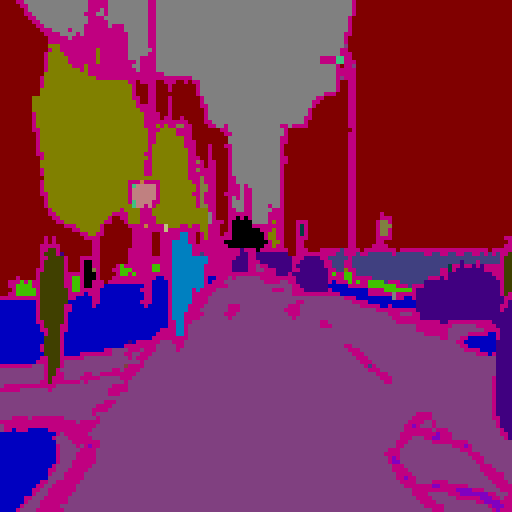

In [121]:
a = test(outputs[0]);
a = a.reshape([128, 128, 3])

from google.colab.patches import cv2_imshow
a = cv2.resize(a, (512, 512), interpolation = cv2.INTER_AREA)
cv2_imshow(a)